Markov Chain Monte Carlo Method
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Markov Chain Monte Carlo Methods</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 421, Spring 2024
Instructor: Brian Munsky
Authors: Drs. Kaan Öcal, Huy Vo, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



In [2]:
# @title Importing packages
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm        # progress bars

# Monte Carlo methods

![monte_carlo.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/D8E_1411_%288525313935%29.jpg/640px-D8E_1411_%288525313935%29.jpg)

*Source: Wikimedia*

## What is a Monte Carlo method?

A Monte Carlo method, named after a famous casino in Monaco, is any algorithm that uses randomly generated numbers to solve a numerical problem.

For example, if we try to estimate the mean of a probability distribution $p(x)$, we can draw a few samples from $p(x)$ and compute their average. This will give a rough estimate of the mean, and we can make our estimate more precise by drawing more samples from $p(x)$. Note that our estimate of the mean can fluctuate randomly, even though the true mean of $p(x)$ is a deterministic quantity.

The main advantage of Monte Carlo approaches is that they are often easier to implement than other methods, and they are usually flexible enough to work for many related problems with small modifications. Their main disadvantage is that the outputs are random by nature, and obtaining enough samples to obtain reliable estimates can be very time-consuming for some problems.

A typical Monte Carlo method goes like this:
1. Fix a probability distribution to sample from
2. Generate a sequence of random samples from that probability distribution
3. Perform a deterministic computation on each sample
4. Combine your results to arrive at the answer

## **Example:** Computing the number $\pi$ using Monte Carlo

To demonstrate the flexibility of Monte Carlo methods we can try to compute $\pi$ using randomn sampling. In the figure below we see a circle with radius $r = 1$:

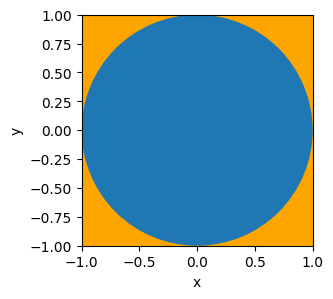

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(3,3))

circle = plt.Circle((0, 0), 1)
square = plt.Rectangle((-1, -1), 2, 2, color="orange")

ax.add_patch(square)
ax.add_patch(circle)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_xlabel("x")
ax.set_ylabel("y");

ax.set_aspect("equal");

From the formula $A = \pi r^2$ we know that the circle has area $\pi$. The square containing the circle has area $4$, so the circle fills out $\pi/4$ of the square. In other words, if we sample a point at random from the square, then with probability $\pi/4$ it will lie in the circle.

We can now estimate $\pi$ by repeatedly sampling points from the square and counting how many of them lie in the circle. This is a typical example of a Monte Carlo method:
1. Our probability distribution is uniform on the square.
2. We sample points from that distribution, so that we get even coverage of the square
3. For each point, check if it lies inside the unit circle.
4. Return the fraction of points that lie inside the unit circle, times $4$.

In [ ]:
# @title Estimating $\pi$ using random sampling
N = 100_000_000 # number of samples to use.

# Draw random points in the square by sampling their x and y coordinates
points = np.random.uniform(-1, 1, size=(N, 2))

# The interior of the circle is given by the equation x^2 + y^2 <= 1
# (Pythagoras' Theorem)
inside = (points[:,0] ** 2 + points[:,1] ** 2) <= 1
pi_est = 4 * np.mean(inside)

print(f"π is approximately {pi_est}")

π is approximately 3.14170264


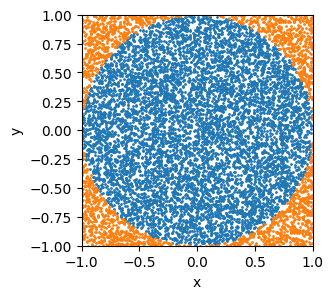

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(points[inside,0], points[inside,1], s=1)
ax.scatter(points[~inside,0], points[~inside,1], s=1)    # ~ negates the condition

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_xlabel("x")
ax.set_ylabel("y");

ax.set_aspect("equal")

We expect that our approximation will get better the more samples we use. In fact, we can compute the variance of our estimate:

$$ \mathrm{Var}(\hat \pi) \approx 0.674 \cdot \frac 1 {N} $$

The variance decreases in proportion to $N$, which tells us that our estimate will get more accurate the larger $N$ is. More precisely, since the variance measures the typical deviation squared, we predict that the actual error decreases as $1 / \sqrt{N}$. We can verify this empirically:

<ipython-input-5-51f66bded8bc>:10: RuntimeWarning: divide by zero encountered in true_divide
  pi_est = 4 * np.cumsum(inside) / range(N)


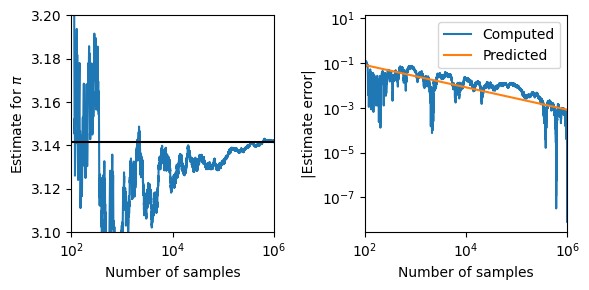

In [ ]:
# @title Estimating the Monte Carlo error
# Draw a lot of points at once
N = 1_000_000
points = np.random.uniform(-1, 1, size=(N, 2))

# Check which points are inside the circle
inside = (points[:,0] ** 2 + points[:,1] ** 2) <= 1

# Compute a running estimate of π
pi_est = 4 * np.cumsum(inside) / range(N)

fig, ax = plt.subplots(1,2, sharex=True, figsize=(6, 3))

# Plot the estimate vs. π
ax[0].plot(range(N), pi_est)
ax[0].set_ylim([3.1,3.2])
ax[0].set_xlabel("Number of samples")
ax[0].set_ylabel("Estimate for $\pi$")
ax[0].axhline(np.pi, color="black")

# Plot the magnitude of the error
ax[1].plot(range(N), abs(pi_est - np.pi))
ax[1].plot([1, N], np.sqrt(0.674) / np.sqrt([1., N]))   # the error should decrease as 1/sqrt(N)
ax[1].set_xscale("log")
ax[1].set_xlim([100, N])
ax[1].set_yscale("log")
ax[1].set_xlabel("Number of samples")
ax[1].set_ylabel("|Estimate error|")
ax[1].legend(["Computed", "Predicted"])

plt.tight_layout()

In this example we can compute the error because we know the true value of $\pi = 3.14159$... In general we don't exactly know the quantity we are trying to estimate, and it can be hard to detect when we have sufficient samples to be confident about our answer.

This is a simple example of a Monte Carlo method where the distribution we need to sample from (uniform) is very tractable. In Bayesian inference, the distribution we want to sample from (the posterior) is often very complex. The standard way to sample from such complex distributions, and our goal for this lecture, is using Markov Chain Monte Carlo (MCMC). In the next section we will talk about Markov chains, the essential idea behind MCMC, before finally moving on to applications.

## Exercises

1. **a.** In the example, each sampled point has a $\pi / 4$ chance of being in the circle. Show that the total number of points lying in the circle follows the binomial distribution $\textrm{Bin}(N, \pi/4)$.

    **b.** Using the properties of the binomial distribution, compute the variance of our estimate of $\hat \pi$ and check that it agrees with the equation above.

## A note on formulas vs. samples

There are two ways to compute the posterior in Bayesian inference:
* Find a formula for the posterior
* Obtain representative samples for the posterior

The former approach might seem more sensible since we are used to understanding probability distributions based on their formulae. For example, the normal distribution is defined by its pdf,

$$ p(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} $$

But actually deriving useful information from such a formula can be hard. Even computing the mean and variance (or the normalisation constant $\sqrt{2\pi}$) for the normal distribution is not trivial, and the normal distribution is one of the simplest distributions we know. The posteriors we encounter in real life often have very complicated formulae, and doing any calculations based on these is going to be difficult.

Perhaps counterintuitively, having a formula for a probability distribution does not mean we know how to sample from it, as we will see in the exercises.

## Exercises

1. Using the pdf for the normal distribution, compute its mean and variance. Can you compute the mean of $\sqrt{x}$?

    *Hint: The normal distribution is symmetric about $0$, which allows you to determine the mean. For the variance, use integration by parts. Where do we need the normalisation constant $\sqrt{2\pi}$? For $\sqrt{x}$, good luck.*

2. *(For later)*. The Poisson distribution with rate $\lambda$ has pdf

$$ \mathrm{Poi}(n; \lambda) = e^{-\lambda} \frac{\lambda^n}{n!} $$

Think about how you would sample from the Poisson distribution - there are various possibilities. Carefully analyse how much knowledge of the pdf helps you in this task, versus special properties of the Poisson distribution.

# Markov chains

## Definition

A *Markov chain* is a memoryless random walk (in some space $E$).

What does this mean? Our random walk starts with an initial position in our space $E$, which we call $X_0$. This $X_0$ may be pre-specified, or it may itself be random. In either case, once we have fixed $X_0$, we move step by step to positions $X_1$, $X_2$, $X_3$, $\ldots$ in our space $E$, which comprise our walk.

The individual positions we visit are random, so we cannot predict where we will eventually end up. The probability law for each step, however, is fixed and satisfies the following

**Rule:** Given our current position $X_n$, the next position $X_{n+1}$ is independent of the positions before $X_n$.

This is what memoryless means: where we go next does not depend on the past, but only on the present.

To define a Markov chain we need to define the initial distribution $p(X_0)$, as well as the *transition distributions* $p(X_{n+1} | X_n = x)$ for all possible positions $x$. Since $X_{n+1}$ only depends on $X_n$, but not any of the previous positions, this is all the information we need.

## Marginal distributions

Given the initial position $X_0$, we cannot predict where we will end up after $n$ steps, that is, we cannot compute $X_n$. We can nevertheless compute the probability distribution of $X_n$ for each $n$. These are called the **marginal distributions** of the Markov chain. The initial distribution $p(X_0)$ is one marginal distribution.

The marginal distribution of $X_1$ is given by the following formula

$$ p(X_1 = x) = \sum_{y \in E} p(X_1 = x \, | \, X_0 = y) \, p(X_0 = y) $$

This follows from the law of total probability: to get the probability of ending up at $x$, we just take the probability of moving to $x$ from any starting position $y$, times the probability of actually starting at $y$, and sum the results for all possible $y$.

The marginal distribution of $X_2$ can be computed the same way if we know the distribution of $X_1$, and once we know the distribution of $X_2$, we can compute the marginal distribution of $X_3$, then $X_4$, etc. The marginal distributions can all be obtained from the same general formula, which we will call the update equation:

$$ p(X_{n+1} = x) = \sum_{y \in E} p(X_{n+1} = x \, | \, X_{n} = y) \, p(X_{n} = y) $$

## Exercises
These questions assume some knowledge of linear algebra. Assume the states of the Markov chain are numbered $1, 2, \ldots, k$.
1. Show that any probability distribution on the states can be expressed as a $k$-dimensional vector $\vec p$, where $p_i = p(i)$.
2. Show that the transition distributions can be expressed as a $k\times k$ matrix $\bf T$, where $T_{x,y} = p(X_{n+1} = x \, | \, X_n = y)$.
3. If the distribution of $X_n$ is given by the vector $\vec p$, then the distribution of the next state $X_{n+1}$ is given by the matrix-vector product ${\bf T} \cdot \vec p$.
4. If the initial distribution is given by $\vec p$, then the distribution of the $n$-th state $X_n$ is given by ${\bf T}^n \cdot \vec p = {\bf T} \cdot {\bf T} \cdot \ldots \cdot {\bf T} \cdot \vec p$.

## **Example:** Brownian motion

Brownian motion, or the random movement of small particles in a solution, is an example of a Markov chain: if we measure the particle at fixed time intervals, then its path will be random, and knowing where the particle was in the past generally does not tell us anything about where it will move next.

Here the space is $\mathbb{R}^3$, our standard $3$-dimensional space. Between observations the molecule moves from its current position $X_n$ to a random new position $X_{n+1}$. How is $X_{n+1}$ distributed? For standard Brownian motion we make the assumption that $X_{n+1}$ equals $X_n$ plus a normally-distributed displacement:

$$ X_{n+1} = X_n + \sqrt{D} \cdot \epsilon_n $$

Here $\epsilon_n$ follows the standard normal distribution. This is justified by the Central Limit Theorem, which says that summing up many small independent random displacements gives us a normal distribution. The diffusion parameter $D$ determines the scale of the displacement and measures the typical distance moved between steps.

If the particle starts at the origin, then after $n$ steps the distribution of the particle will be normal (with variance $n \cdot D$). Thus the marginal distributions of Brownian motion are normal, centered around the initial position.

In [ ]:
#@title
def colorline(ax, x, y, colors=None, **kwargs):
    """
    Fancy version of plt.plot, taken from
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html

    Plot a colored line with coordinates x and y.
    """

    # Default colors equally spaced on [0,1]:
    if colors is None:
        colors = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(colors, "__iter__"):  # to check for numerical input -- this is a hack
        colors = np.array([colors])

    colors = np.asarray(colors)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = matplotlib.collections.LineCollection(segments, array=colors, **kwargs)

    ax.add_collection(lc)

    return lc

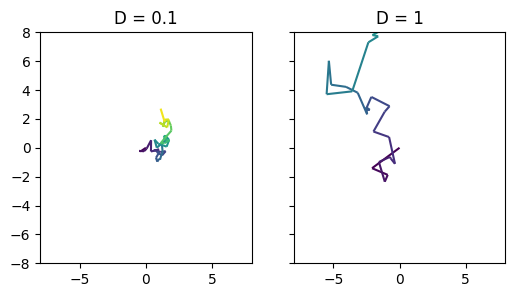

In [ ]:
# @title Brownian motion, visualised
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 3))

nsteps = 50
Ds = [ 0.1, 1 ]

for (ax, D) in zip(axes, Ds):
  # Simulate Brownian motion for `nsteps` steps
    Xs = np.zeros((nsteps+1, 2))
    for n in range(nsteps):
        Xs[n+1,:] = Xs[n,:] + np.sqrt(D) * np.random.randn(2)

    colorline(ax, Xs[:,0], Xs[:,1])

    ax.set_title(f"D = {D}")

    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)

### Exercises

Consider a particle undergoing Brownian motion with diffusion constant $D$.
1. Show that the particle does not drift in any direction: $\mathbb{E}[X_n] = 0$.
2. Show that the average square displacement between steps is given by $\mathbb{E}[\left|X_{n+1} - X_n\right|^2] = 3D$.

*Hint: By Pythagoras' Theorem, for any vectors $\vec a$ and $\vec b$ in 3 dimensions,*

$$\left|\vec a - \vec b\right|^2 = (a_x - b_x)^2 + (a_y - b_y)^2 + (a_z - b_z)^2 $$

3. Show that the marginal distribution of $X_n$ is normal with variance $n \cdot D$. How does this distribution change as $n$ becomes larger?


Markov chains are useful because they are easy to simulate, but can give rise to very complex marginal distributions. This provides an easy way to sample complex distributions: simply construct a Markov chain whose marginal distributions approach the desired target distribution. This is the essence of Markov chain Monte Carlo. In order to understand MCMC a bit better we will study marginal distributions in some more detail.

## Stationary distributions

In this section we focus on the marginal distributions $p(X_n)$ and how they evolve in time. If we start a Markov chain with initial distribution $X_0$, then the distribution of each subsequent step $X_n$ can be computed iteratively using the update equation above. It often happens that the marginal distributions $p(X_n)$ become more and more similar with each step, and eventually converge to a limiting distribution $\pi$. This is called the **stationary**, or equilibrium distribution of the Markov chain.

We can write $\pi = p(X_\infty)$, which is not mathematically rigorous, but captures the intuition.

### Example: Brownian motion

Let us illustrate stationary distributions using Brownian motion. If we place a small particle in a beaker of solution, then its location is well determined at first. But as time passes, the particle diffuses away and its position becomes harder to predict. If we wait long enough, the particle can be anywhere in the beaker - the  equilibrium distribution is uniform within the container. We can observe this by placing a droplet of ink in water: at first the droplet is very localised, but it slowly spreads out until eventually the ink is evenly distributed in the container, reflecting the uniform distribution of the individual ink molecules in the water.

**Note:** The idealised Brownian motion we discussed above does not take place in a bounded region and does not have a stationary distribution. The marginal distributions simply become more and more spread out.

## An equation for the stationary distribution
The stationary distribution $\pi$ has an important property, namely

**Stationarity:** If $X_n$ is distributed according to $\pi$, then $X_{n+1}$ is also distributed according to $\pi$.

This makes sense: the distributions of the $X_n$ and $X_{n+1}$ approach each other more and more as $n$ becomes larger, so in the limit the distribution of $X_{\infty+1}$ is exactly the same as $X_{\infty}$.

We can write this using our update equation as
$$ \pi(x) = \sum_{y \in E} p(X_{n+1} = x \, | \, X_{n} = y) \, \pi(y) $$

## Probability flow and detailed balance

In general it may be difficult to compute the stationary distribution $\pi$ using the last equation. If we consider Brownian motion in a container, it is not obvious that our droplet of ink will eventually be uniformly dispersed through the container, no matter its shape. But physically this is what happens, as can be observed by experiment.

To understand the stationary distribution we can consider the motion of ink in the container. Brownian motion is symmetric, that is, the probability for a particle to move from position $x$ to $y$ in one step equals the probability of moving from $y$ to $x$. If the ink is uniformly distributed in the container, that means that the *total amount* of ink moving from $x$ to $y$ is the same as that moving from $y$ to $x$. In other words, while individual ink molecules will jump around from place to place, on a macroscopic scale these jumps cancel out exactly and no net movement occurs. If there is more ink in one region of the container, then more molecules will move out from that region and the ink distribution will still change.

This argument uses the probability flow $F(x \leftarrow y)$, which measures the total amount of probability moving from state $y$ to $x$ and is given by

$$ F(x \leftarrow y) = p(X_n = y) \, P(X_{n+1} = x \, | \, X_n = y) $$

We can interpret the update equation in terms of the probability flow as follows: the probability that $X_n = x$ is the sum of the probability flowing into $x$ at step $n$, starting from the distribution $X_{n-1}$ at the previous step.

We say that **detailed balance** occurs if the probability flux from any state $x$ to any other state $y$ is equal to the probability flux from $y$ to $x$:

$$ F(x \leftarrow y) = F(y \leftarrow x) $$

A distribution for which detailed balance holds is a stationary distribution of the Markov chain: the net probability flow between any two states is $0$.

**Important:** Not all stationary distributions satisfy detailed balance.

Detailed balance does not always hold, but when it does, it is usually easy to verify and makes a lot of calculations much simpler.

# Markov Chain Monte Carlo

## Overview

The idea behind Markov chain Monte Carlo is simple. Given an arbitrary target distribution $\pi$, we construct a Markov chain whose stationary distribution is $\pi$. We can then sample from $\pi$ by picking an initial value $X_0$ and simulating the Markov chain until we have reached the stationary distribution. We can formalise this as follows

**Input:** Target distribution $\pi(x)$.

**Output:** Samples from the target distribution.

**Steps:**
1. Construct a Markov chain whose stationary distribution is $\pi$
2. Pick an arbitrary initial value $X_0$
3. Simulate steps $X_1, X_2, X_3, \ldots$ until $p(X_N) \approx p(X_\infty) = \pi$
4. Return $X_N, X_{N+1}, X_{N+2}, \ldots$

The number of steps required until $p(X_N)$ resembles $\pi$ is called the burn-in period. The samples during the burn-in period, depending on the initial value $X_0$, will not be distributed correctly and are discarded. Once the burn-in is complete, subsequent samples will be approximately distributed according to the target distribution.

**Note:** The stationary distribution is an *asymptotic* limit, ie. $p(X_n)$ only approximates the target distribution for large $n$. Our algorithm is therefore not exact, but we can make the difference between $p(X_n)$ and $\pi$ as small as desired by picking a suitably large burn-in period.

**Note:** Each sample returned from the algorithm is (approximately) sampled from $\pi$, but the samples are not *independent*. Because we are simulating a random walk, each sample will be similar to the last sample. We may need a lot of samples to fully explore the target distribution.

The main question we are left with is that of constructing the right Markov chain. There are a variety of ways to do this, but the most widespread one is the Metropolis-Hastings algorithm.


## Exercises
1. This exercise again uses some linear algebra. Assume the states of the Markov chain are numbered $1, 2, \ldots, k$. If $\bf T$ is the transition matrix, and the stationary distribution is represented by the vector $\vec \pi$, show that $\vec \pi = {\bf T} \cdot \vec \pi$. That is, $\vec \pi$ is an eigenvector of the transition matrix with eigenvalue $1$.

2. Show that any distribution $\pi$ for which detailed balance holds is a stationary distribution.

3. Show that for Brownian motion in a container, detailed balance holds for the uniform distribution, so the uniform distribution is the stationary distribution.

4. *(Bonus)* Can you find a Markov chain with a stationary distribution that does not satisfy detailed balance?

    *Hint: Look for a Markov chain with $3$ states.*

## The Metropolis-Hastings algorithm

Assume we are given a target distribution $\pi$ and *any* Markov chain with transition probabilities $p(x \, | \, y)$. In general, $\pi$ will not be the stationary distribution of this Markov chain. But by tweaking the transition probabilities a little bit we can always arrange for that to be the case.

**Notation:** In the following we denote the original transition properties by $q(x \, | \, y) = p(x \, | \, y)$. This notation is almost universal in the MCMC literature.

The solution uses [Maxwell's demon](https://en.wikipedia.org/wiki/Maxwell%27s_demon), a small, fiendish creature that follows our particle through the Markov chain and gatekeeps its movement. Whenever the particle wants to move from state $x$ to another state $y$, there is a certain chance the demon blocks the move and the particle stays at $x$. If this happens we say that the move has been rejected, otherwise it is accepted and the particle moves to $y$.

Denote by $\alpha(y \, | \, x)$ the probability that a move from $x$ to another state $y$ is accepted by the demon. The transition probability from $x$ to $y$ changes from  $q(y \, | \, x)$ to $\alpha(y \, | \, x) \cdot q(y \, | \, x)$.

Our target distribution satisfies detailed balance for this modified Markov chain if

$$ \frac{\pi(x)}{\pi(y)} = \frac{q(x \, | \, y) \cdot \alpha(x \, | \, y)}{q(y \, | \, x) \cdot \alpha(y \, | \, x)} $$

We can rearrange this as

$$ \frac{\alpha(y \, | \, x)}{\alpha(x \, | \, y)} = \frac{\pi(y)}{\pi(x)} \cdot \frac{q(x \, | \, y)}{q(y \, | \, x)} $$

Call the right-hand side $r(y, x)$. We can choose any set of acceptance probabilities between $x$ and $y$ as long as they are between $0$ and $1$ and satisfy this equation. The perhaps simplest way to achieve this is the following:
* If $r(y, x) < 1$, let $\alpha(y \, | \, x) = r(y, x)$ and $\alpha(x \, | \, y) = 1$
* If $r(y, x) > 1$, let $\alpha(y \, | \, x) = 1$ and $\alpha(x \, | \, y) = 1 / r(y, x)$

This quantity is called the acceptance ratio.

In pseudocode, if we start at position $x$, to perform the next step we do the following:
1. Sample a value $y$ from $q(y \, | \, x)$
2. Compute the Metropolis-Hastings ratio
$$\alpha = \frac{\pi(y)}{\pi(x)} \cdot \frac{q(x \, | \, y)}{q(y \, | \, x)}$$
3. If $\alpha > 1$, move to $y$. If $\alpha \leq 1$, move to $y$ with probability $\alpha$, otherwise stay at $x$.

**Note:** Since each step is subject to rejection by the demon, the Metropolis-Hastings algorithm will often remain in one same state for many steps. This duplication of states is expected behaviour.

**Important:** The Metropolis-Hastings algorithm only uses the probability ratio $\pi(y) / \pi(x)$. We therefore do not have to know the normalising constant of $\pi$ as it cancels out. This makes Metropolis-Hastings very useful for Bayesian inference, where we can often compute the unnormalised posterior (prior times likelihood), but not the normalisation constant.

## Exercises

1. Show that the Metropolis-Hastings algorithm describes a Markov chain that has $\pi$ as its stationary distribution.

3. Show that for symmetric proposals with $q(y \, | \, x) = q(x \, | \, y)$ the acceptance ratio simplifies to

$$ \alpha = \frac{\pi(y)}{\pi(x)} $$

## Metropolis-Hastings in action

In this section we will revisit two examples - the coin toss, and the gene expression model - to see how MCMC provides an alternative way to compute the posteriors. We can write a utility function, `metropolis_hastings`, that does most of the work for us, and just plug in the numbers for the two examples.

In [ ]:
#@title
def simulate_step(log_target, proposal_width, x):
  """
  Perform one step of the MH algorithm starting at `x`, with a normal distribution
  for the proposal. `log_target` is the logarithm of the target distribution
  and `proposal_width` is the width of the proposal distribution. Returns the next
  sample.
  """
  # propose a new value
  y = x + proposal_width * np.random.randn(len(x))

  log_alpha = log_target(y) - log_target(x)     # the q-terms cancel

  if log_alpha > 0:
    return y           # accept

  alpha = np.exp(log_alpha)

  p = np.random.rand()
  if p < alpha:        # this happens with probability alpha
    return y           # accept
  else:
    return x           # reject

def metropolis_hastings(log_target, proposal_width, nsteps, x0):
  """
  Perform MCMC by running the Metropolis-Hastings algorithm for `nsteps` steps,
  starting at `x0`. `log_target` is the logarithm of the target distribution
  and `proposal_width` is the width of the proposal distribution. Returns a matrix
  of samples.
  """

  ret = np.zeros((nsteps, len(x0)))
  ret[0] = x0

  for i in tqdm(range(1, nsteps)):
    ret[i] = simulate_step(log_target, proposal_width, ret[i-1])

  return ret

## Example: Flipping coins (again)

We can use our helper function to perform MCMC for us. We choose $X_0 = 0.5$ for our initial position, although any number between $0$ and $1$ will be fine. The width of our proposal distribution is $0.1$ - while any positive number will work in theory, very small or very large values will result in slow convergence. We already have the (unnormalised) posterior density, and finally choose a burn-in period of $1000$.

In [ ]:
def logposterior_unnormalised_ct(x):
  h = x[0]

  return np.log(posterior_unnormalised_ct(h, data_ct))

nsamples = 10000
burnin = 1000
post_ct_mcmc = metropolis_hastings(logposterior_unnormalised_ct, 0.1, nsamples + burnin, np.array([0.5]))
post_ct_mcmc = post_ct_mcmc[burnin:]        # We assume a burn-in period of 100

# This is the actual posterior
post_ct_exact = sp.stats.beta(4 + n_heads, 4 + len(data_ct) - n_heads).rvs(nsamples)

  0%|          | 0/10999 [00:00<?, ?it/s]

<ipython-input-16-822401e6dbac>:4: RuntimeWarning: divide by zero encountered in log
  return np.log(posterior_unnormalised_ct(h, data_ct))


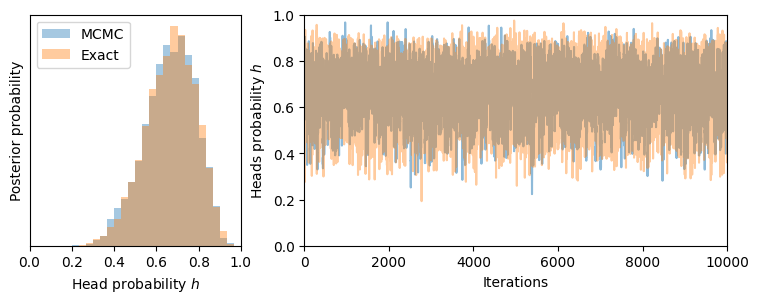

In [ ]:
fig, ax = plt.subplots(1, 2, width_ratios=[1, 2], figsize=(9, 3))
ax[0].hist(post_ct_mcmc[:,0], range=(0, 1), bins=30, alpha=0.4, label="MCMC")
ax[0].hist(post_ct_exact, range=(0, 1), bins=30, alpha=0.4, label="Exact")

ax[0].set_xlabel("Head probability $h$")
ax[0].set_ylabel("Posterior probability")
ax[0].set_yticks([])
ax[0].set_xlim(0, 1)

ax[0].legend(loc="upper left")

ax[1].plot(post_ct_mcmc[:,0], alpha=0.5)
ax[1].plot(post_ct_exact, alpha=0.4)

ax[1].set_xlim(0, nsamples)
ax[1].set_ylim(0, 1)

ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Heads probability $h$");

## Example: Gene expression

To demonstrate the flexibility of MCMC we only have to change a few lines in this example. We only change the target density, the initial value (set to the prior mean) and in order to get somewhat faster convergence we set the proposal width to $0.3$.

In [ ]:
def logposterior_unnormalised_ge(x):
  rho = x[0]
  return np.log(posterior_unnormalised_ge(rho, data_ge))

nsamples = 1000
burnin = 1000
post_ge_mcmc = metropolis_hastings(logposterior_unnormalised_ge, 0.1, nsamples + burnin, np.array([5.]))
post_ge_mcmc = post_ge_mcmc[burnin:]        # We assume a burn-in period of 100

# This is the actual posterior
post_ge_exact = sp.stats.gamma(1 + np.sum(data_ge), scale = 5 * deg / (5 * len(data_ge) + 1)).rvs(nsamples)

  0%|          | 0/1999 [00:00<?, ?it/s]

Text(0, 0.5, 'Production rate $\\rho$')

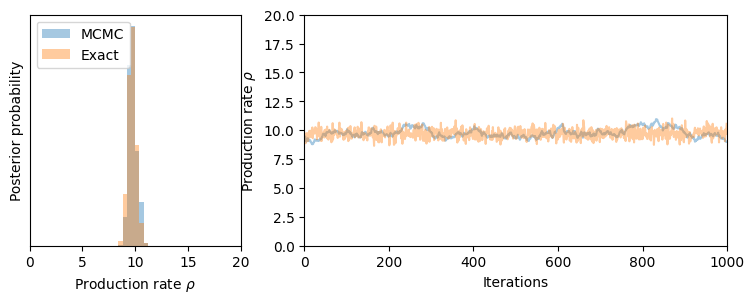

In [ ]:
#@title
fig, ax = plt.subplots(1, 2, width_ratios=[1, 2], figsize=(9, 3))

ax[0].hist(post_ge_mcmc[:,0], range=(0, 20), bins=50, alpha=0.4, label="MCMC")
ax[0].hist(post_ge_exact, range=(0, 20), bins=50, alpha=0.4, label="Exact")

ax[0].set_xlabel("Production rate $\\rho$")
ax[0].set_ylabel("Posterior probability")
ax[0].set_yticks([])
ax[0].set_xlim(0, 20)

ax[0].legend(loc="upper left")

ax[1].plot(post_ge_mcmc[:,0], alpha=0.4)
ax[1].plot(post_ge_exact, alpha=0.4)

ax[1].set_xlim(0, nsamples)
ax[1].set_ylim(0, 20)

ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Production rate $\\rho$");

## MCMC & The Chemical Master Equation

We just illustrated a typical workflow when estimating model parameters:
1. Define a quantitative model with some unknown parameters $\theta$, and fix a prior $p(\theta)$
2. Collect experimental data
3. Write down the likelihood function $p(\mathcal{Data} \, | \, \theta)$
4. Optimise the likelihood to get parameter estimates **OR** compute posterior using MCMC

Focussing on point 3., we were able to compute the likelihood function explicitly in the above example. For most reaction networks we cannot do that, and we need to find another way to compute the likelihoods.

The experimental data consists of the number of molecules measured per cell at different time points. To compute the likelihood we thus need to know the probability of observing a fixed number of molecules in a cell. But this is precisely what the Chemical Master Equation computes. In short:

**The Chemical Master Equation can be solved to compute the likelihood function.**

Instead of using the Poisson solution in the last example, we can solve the Chemical Master Equation numerically.

In [ ]:
def likelihood_ge_fsp(rho, data, Nmax=50):
  # Build FSP matrix. We choose a truncation to 100 states.
  A = build_fsp_matrix(rho, Nmax)

  # Build initial conditions
  u0 = np.zeros(Nmax)
  u0[0] = 1                       # Assign probability 1 to the state with 0 mRNA

  # Compute steady-state solution
  # We approximate this by solving the system for large enough t
  ut = solve_odes(A, u0, 100)

  # The probability of observing n molecules in a cell is now ut[n].
  ret = 1
  for n in data:
    ret *= ut[n]

  return ret

def build_fsp_matrix(rho, Nmax):
  ret = np.zeros((Nmax, Nmax))

  for i in range(Nmax):
    if i+1 < Nmax:
      ret[i+1,i] = rho          # mRNA production going from i to i+1
    if i > 0:
      ret[i-1,i] = i * deg      # mRNA degradation going from i to i-1

    ret[i,i] = -(rho + i * deg)

  return ret

def solve_odes(A, u0, t):
  return sp.linalg.expm(A * t) @ u0

# Unnormalised posterior, computed using the FSP
def logposterior_unnormalised_ge_fsp(x):
  rho = x[0]
  return np.log(prior_ge(rho)) + np.log(likelihood_ge_fsp(rho, data_ge))

# Sample from the posterior using MCMC
post_ge_mcmc = metropolis_hastings(logposterior_unnormalised_ge_fsp, 0.1, nsamples + burnin, np.array([5.]))
post_ge_mcmc = post_ge_mcmc[burnin:]        # We assume a burn-in period of 100

  0%|          | 0/1999 [00:00<?, ?it/s]

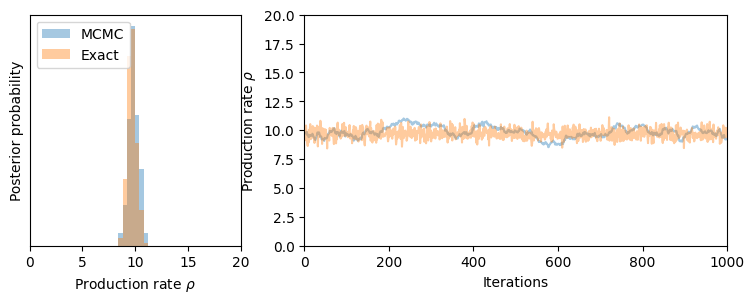

In [ ]:
fig, ax = plt.subplots(1, 2, width_ratios=[1, 2], figsize=(9, 3))

ax[0].hist(post_ge_mcmc[:,0], range=(0, 20), bins=50, alpha=0.4, label="MCMC")
ax[0].hist(post_ge_exact, range=(0, 20), bins=50, alpha=0.4, label="Exact")

ax[0].set_xlabel("Production rate $\\rho$")
ax[0].set_ylabel("Posterior probability")
ax[0].set_yticks([])
ax[0].set_xlim(0, 20)

ax[0].legend(loc="upper left")

ax[1].plot(post_ge_mcmc[:,0], alpha=0.4)
ax[1].plot(post_ge_exact, alpha=0.4)

ax[1].set_xlim(0, nsamples)
ax[1].set_ylim(0, 20)

ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Production rate $\\rho$");

We get the same results as before. This version, however, takes much longer to run. This is because we have to solve the Chemical Master Equation once at each step of our MCMC chain, and doing so requires a fair bit of matrix computation on behalf of the computer. A system with $100$ states is not a big deal for modern computers, but more complex systems can cause a fair amount of frustration.

## Exercises

1. Write a function `metropolis_hastings(log_target, proposal_width, nsteps, x_0)` that runs the Metropolis-Hastings algorithm for `nsteps` iterations starting at `x_0` and returns the sequence of states visited. The argument `log_target(x)` is a function that computes the log probability of the target distribution at its argument `x`. The proposal distribution at a position `x` is the normal distribution scaled by the factor `proposal_width`, that is, we start with Brownian motion with diffusion constant `proposal_width ** 2`.

2. **a.** Using the above function, write a program that produces samples from the exponential distribution $\textrm{Exp}(1)$. You can choose any `proposal_width` you like. How long is the burn-in period? Verify that your code works correctly by comparing a histogram of the returned samples with the exponential distribution.

   **b.** Plot a time trace of your samples, and compare it with samples obtained directly using `scipy`. Can you see the difference between the samples obtained using MCMC and independent samples?

   **c.** What do you observe if you choose a very small `proposal_width`? What about a very large `proposal_width`? Can you think of possible explanations for this behaviour?

# The world of MCMC

MCMC is commonly used in fields such as statistical inference, machine learning and statistical mechanics, and is likely to play an increasingly important role in the age of big data and big CPU/GPU. The original Metropolis-Hastings algorithm was developed in the 1950s, but there has been a lot of work on improving MCMC algorithms since. Some of these that are useful for Bayesian inference are:

## Particle filters

A lot of biological data is time-series data, ie. it consists of observations $n_1, n_2, n_3, \ldots$ at different times $t_1, t_2, t_3, \ldots$. There are many specialised MCMC methods for such problems, and they are generally known as [Sequential Monte Carlo (SMC)](https://arxiv.org/abs/2007.11936) methods.

## Complex likelihoods

Metropolis-Hastings requires us to compute the likelihood once per step, but in practice only a fraction of steps are accepted. This is wasteful, particularly when likelihood evaluations are expensive - the CME is a good example. One idea called [delayed acceptance](https://www.tandfonline.com/doi/abs/10.1198/106186005X76983) is to use a cheap approximation to the likelihood to eliminate samples that are likely to be rejected. We can also use machine learning to "learn" the likelihood function from a limited number of evaluations. Finally, we can sometimes use stochastic approximations of the likelihood that are cheaper to compute (ie., using Monte Carlo within MCMC) - this is called [pseudo-marginal](https://www.sciencedirect.com/science/article/pii/S0022519320301107) MCMC.

## No likelihoods

Sometimes likelihoods are so complicated that they are effectively uncomputable. In such cases, we can often probe the likelihood function using stochastic simulations to get an idea of how the system behaves for a certain $x$. This field is generally called simulator-based inference, or likelihood-free inference. [Approximate Bayesian Computation (ABC)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002803) is perhaps the most well-known method in this category, and it involves repeatedly simulating a system at various parameters to find those most consistent with the data. [Synthetic likelihoods](https://doi.org/10.1038/nature09319) are a more recent approach that has gained traction.

## Efficient exploration

Metropolis-Hastings relies on a random walk, often Brownian motion, to explore the posterior. As we know from biology, this can be a very slow way to move around, which has inspired a lot of research. [Hamiltonian Monte Carlo (HMC)](https://arxiv.org/abs/1701.02434) uses a clever combination of physical and statistical ideas to get around this limitation and perform massive jumps between samples, and is currently the gold standard for standard MCMC.

## High-dimensional MCMC

Some posteriors involve sampling thousands of parameters at once, even if we only care about a select few. Exploring high-dimensional spaces effectively is very difficult, and Brownian motion is particularly bad at this. [Gibbs sampling](https://towardsdatascience.com/gibbs-sampling-explained-b271f332ed8d) is a commonly used alternative for high-dimensional problems, but Hamiltonian Monte Carlo also scales fantastically to high dimensions.

## Adaptive MCMC

The performance of most MCMC algorithms is quite sensitive to tuning. Trying to find the right settings by hand for complex or high-dimensional posteriors is cumbersome. MCMC algorithms that adapt to the target distribution on the fly can yield massive improvements in speed while saving researchers a lot of time.

## Probabilistic programming

Probabilistic programming languages allow users to define a stochastic model in a straightforward and intuitive way, with the computer taking over the complicated business of converting this into a likelihood function and writing a MCMC sampler. [Stan](https://mc-stan.org/), [Pyro](https://pyro.ai/) (for Python) or [Turing.jl](https://turing.ml) (for Julia) are modern probabilistic programming languages that allow users to use state-of-the art adaptive Hamiltonian Monte Carlo sampling without having to fret over the details.